# McDonald's Market Segmentation

In [1]:
# Data Manipulation and Visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from bioinfokit.visuz import cluster

# Clustering
from patsy import dmatrices, dmatrix
from scipy.stats import entropy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture

The dataset has various columns which are attributes obtained from a qualitative study conducted for the survey data. Each of these attributes provide a YES or a NO response based on the possession of the particular attribute by the respondent. Along with these columns, respondents have indicated their AGE and GENDER.

In [2]:
mcdonalds = pd.read_csv("C:\\Users\\josea\\OneDrive\\Desktop\\Feynn ML Internship\\Project 2\\McDonalds Case\\mcdonalds.csv")
print(f"This dataset has {len(mcdonalds)} entries. \n")
print("The columns in this dataset include:")
for i in list(mcdonalds.columns):
    print(i)

This dataset has 1453 entries. 

The columns in this dataset include:
yummy
convenient
spicy
fattening
greasy
fast
cheap
tasty
expensive
healthy
disgusting
Like
Age
VisitFrequency
Gender


In [3]:
mcdonalds.shape

(1453, 15)

In [4]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
segmentvars = mcdonalds.iloc[:,:11]
segmentvars

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [6]:
segmentvars.replace({'Yes': 1, 'No': 0}, inplace = True)
segmentvars

C:\Users\josea\AppData\Local\Temp\ipykernel_10512\1843139587.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  segmentvars.replace({'Yes': 1, 'No': 0}, inplace = True)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [7]:
segmentvars.mean()*100

yummy         55.264969
convenient    90.777701
spicy          9.359945
fattening     86.717137
greasy        52.649690
fast          90.020647
cheap         59.876118
tasty         64.418445
expensive     35.788025
healthy       19.889883
disgusting    24.294563
dtype: float64

In [8]:
pca = PCA()
pcafit = pca.fit_transform(segmentvars)

pcexp = np.sqrt(pca.explained_variance_)
pcexpratio = pca.explained_variance_ratio_
pccum = pcexpratio.cumsum()
pcindex = [f"PC{i}" for i in range(1, len(pcexp) + 1)]
pcaresult = pd.DataFrame({'Standard Deviation': pcexp, 'Proportion of Variance': pcexpratio, 'Cumulative Proportion': pccum}, index = pcindex)
pcaresult

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [9]:
print("Standard Deviation:\n", pcexp.round(1))

pcaf = pca.fit(segmentvars)
rotated = pcaf.components_.T

rotated_df = pd.DataFrame(rotated, index = segmentvars.columns.values, columns = pcindex)
rotated_df = round(-rotated_df, 3)
rotated_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


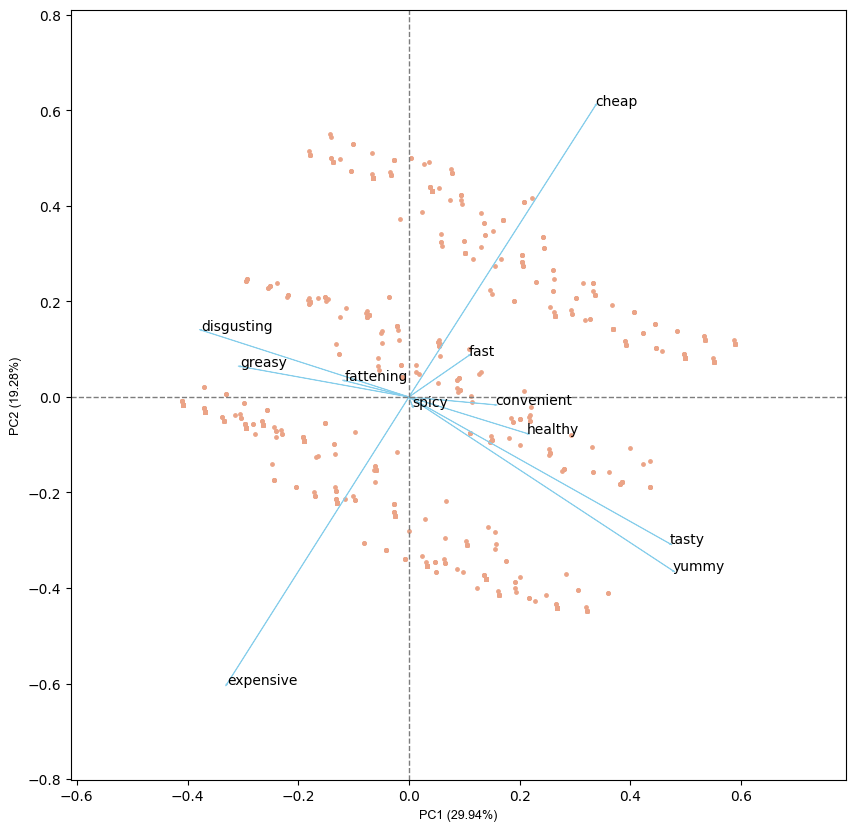

In [10]:
loadings = (pca.components_)
cluster.biplot(cscore = pcafit, loadings = -loadings, labels = mcdonalds.columns.values, 
               var1 = round(pcexpratio[0]*100, 2),
               var2 = round(pcexpratio[1]*100, 2),
               show = True, dim = (10, 10))

Extracting the Clusters

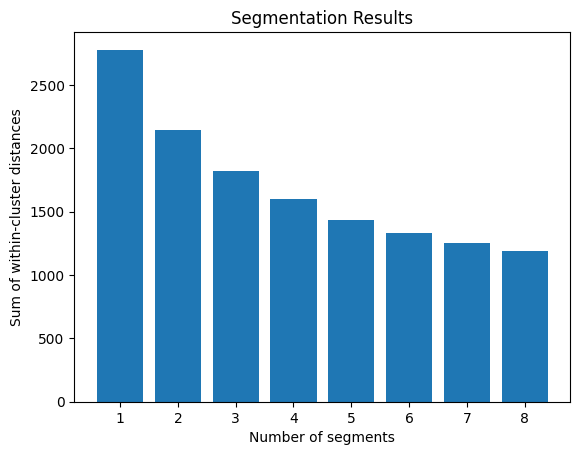

In [11]:
np.random.seed(1234)

num_segments = range(1, 9)
within_cluster_distances = []
MDkm28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 1234)
    kmeans.fit(segmentvars)
    within_cluster_distances.append((kmeans.inertia_))
    MDkm28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

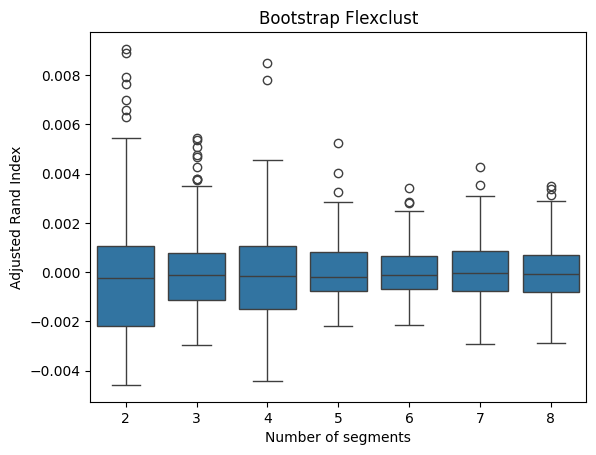

In [12]:
np.random.seed(1234)
nboot = 200
num_segments = range(2, 9)


MDb28 = {k: [] for k in num_segments}
for k in num_segments:
    kmeans_original = KMeans(n_clusters = k, n_init = 10, random_state = 1234)
    kmeans_original.fit(segmentvars.values)
    true_labels = kmeans_original.labels_

    for i in range(nboot):
        bootstrap_sample = resample(segmentvars, replace = True)

        kmeans_bootstrap = KMeans(n_clusters = k, n_init = 10, random_state = 1234)
        kmeans_bootstrap.fit(bootstrap_sample.values)
        bootstrap_labels = kmeans_bootstrap.labels_
        
        ari = adjusted_rand_score(true_labels, bootstrap_labels)
        MDb28[k].append(ari)

ari_data = []
for k, aris in MDb28.items():
    for ari in aris:
        ari_data.append({'Number of Clusters': k, 'ARI': ari})
ari_df = pd.DataFrame(ari_data)

# Create boxplot of adjusted Rand index
sns.boxplot(x = 'Number of Clusters', y = 'ARI', data = ari_df)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

In [13]:
np.random.seed(1234)
k_values = range(2, 9)
MDm28 = []

for k in k_values:
    model = KMeans(n_clusters = k, n_init = 10, random_state = 1234)
    model.fit(segmentvars.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = segmentvars.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MDm28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

MDm28 = pd.DataFrame(MDm28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MDm28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     8       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     9       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     7       True  4   4 -1602.986015  3213.972030  3235.097572  3233.753684
3    13       True  5   5 -1435.324786  2880.649571  2907.056500  2905.465473
4    10       True  6   6 -1332.150483  2676.300966  2707.989280  2706.201149
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6    10       True  8   8 -1191.580948  2399.161896  2441.412982  2439.379225


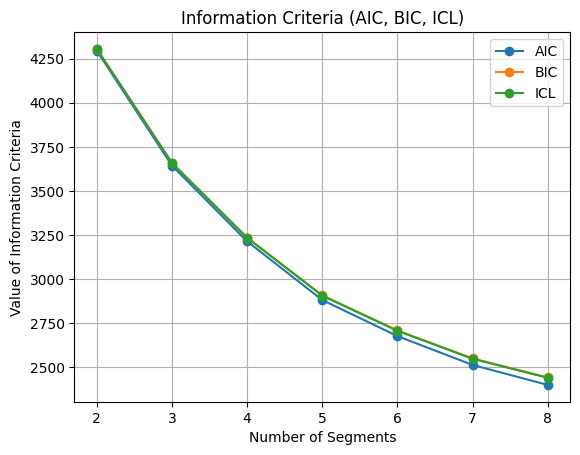

In [14]:
num_segments = MDm28["k"]
AIC_vals = MDm28["AIC"]
BIC_vals = MDm28["BIC"]
ICL_vals = MDm28["ICL"]

plt.plot(num_segments, AIC_vals, marker='o', label='AIC')
plt.plot(num_segments, BIC_vals, marker='o', label='BIC')
plt.plot(num_segments, ICL_vals, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [15]:
k = 4
kmeans = KMeans(n_clusters = k, random_state = 1234)
kmeans.fit(segmentvars)
kmeans_clusters = kmeans.predict(segmentvars)

gm = GaussianMixture(n_components = k, random_state = 1234)
gm.fit(segmentvars)
gm_clusters = gm.predict(segmentvars)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gm_clusters})

MDm4 = segmentvars[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MDm4)
k4_m4_clusters = k4_m4.predict(MDm4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']), "\n")
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256 

kmeans   0   1   2   3
kmeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


In [16]:
gm_m4a = GaussianMixture(n_components = 4)
gm_m4a.fit(segmentvars)

log_likelihood_m4a = gm_m4a.score(segmentvars)

gm_m4 = GaussianMixture(n_components = 4)
gm_m4.fit(segmentvars)

log_likelihood_m4 = gm_m4.score(segmentvars)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071885
Log-likelihood for MD.m4: 3.642746401176581


In [17]:
like_counts = pd.value_counts(mcdonalds['Like'])

print(like_counts)

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64


C:\Users\josea\AppData\Local\Temp\ipykernel_10512\294132665.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  like_counts = pd.value_counts(mcdonalds['Like'])


In [18]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)


liken_counts = mcdonalds['Like.n'].value_counts()


print(liken_counts)

Like.n
 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64


In [19]:
independent_vars = mcdonalds.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str
f = dmatrices(formula_str, data = mcdonalds)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [20]:
np.random.seed(1234)

X = dmatrix(f.design_info, data = mcdonalds)
y = dmatrix('Like', data = mcdonalds)

n_components = 2
n_init = 10
verbose = False
n_rep = 10

model = GaussianMixture(n_components = n_components, n_init = n_init, verbose = verbose)
MDreg2 = model.fit(X, y)

print(MDreg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


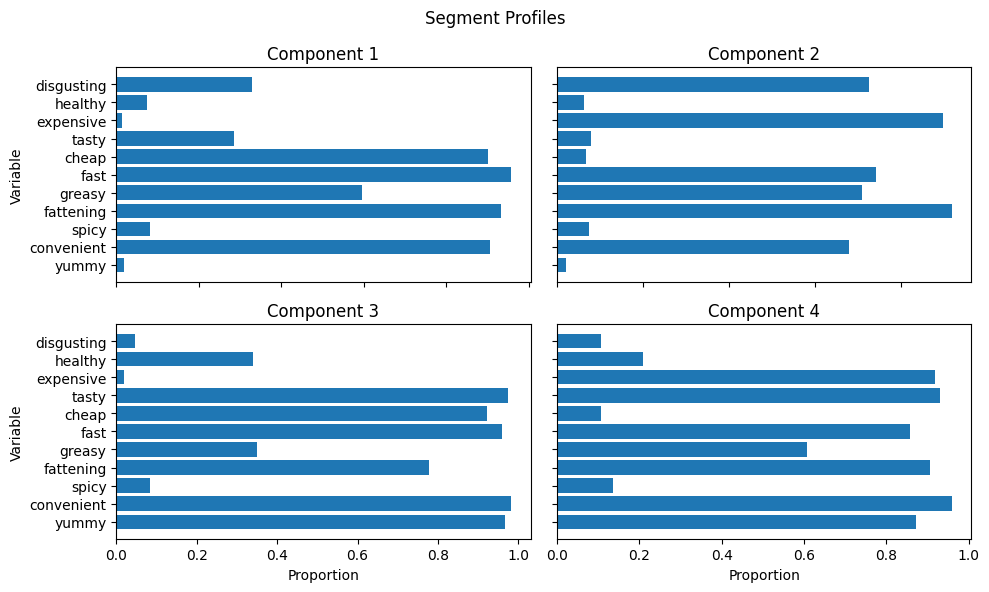

In [21]:
kmeans = MDkm28['4']

labels = kmeans.labels_

MD_mean = segmentvars.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(segmentvars.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

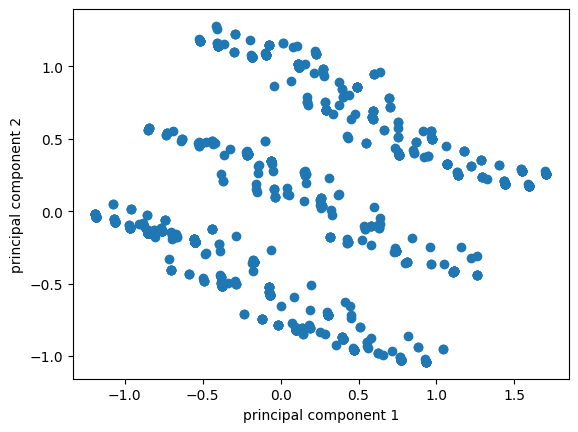

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(segmentvars)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(segmentvars)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

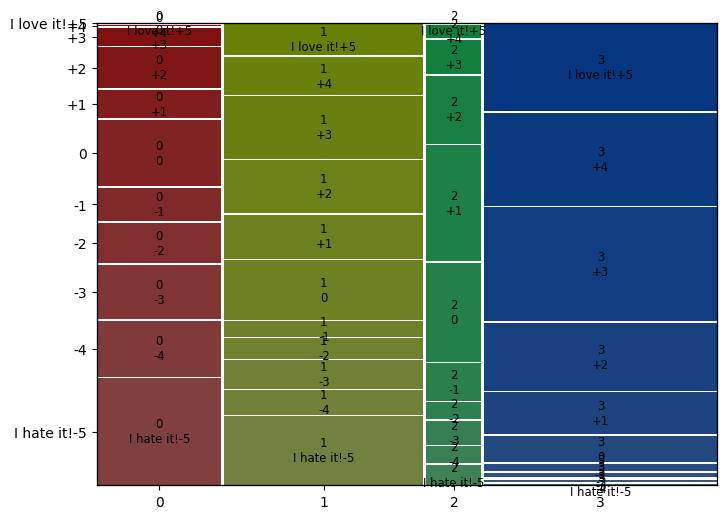

In [23]:
mcdonalds2 = pd.read_csv("C:\\Users\\josea\\OneDrive\\Desktop\\Feynn ML Internship\\Project 2\\McDonalds Case\\mcdonalds.csv")

def labelling(x):
    mcdonalds2[x] = LabelEncoder().fit_transform(mcdonalds2[x])
    return mcdonalds2

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

df_eleven = mcdonalds2.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(df_eleven)
mcdonalds2['cluster_num'] = kmeans.labels_
crosstab = pd.crosstab(mcdonalds2['cluster_num'], mcdonalds2['Like'])

crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
plt.rcParams['figure.figsize'] = (8, 6)
mosaic(crosstab.stack(),)
plt.show()

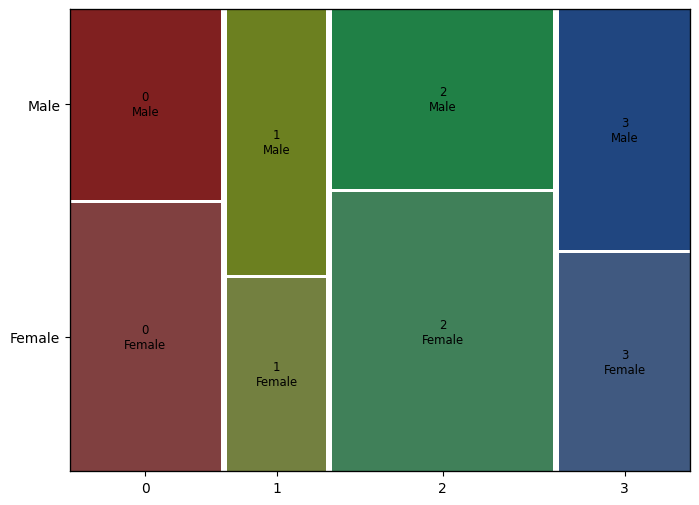

In [24]:
MDk4 = MDkm28['4']
k4 = MDk4.labels_

ct = pd.crosstab(k4, mcdonalds['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

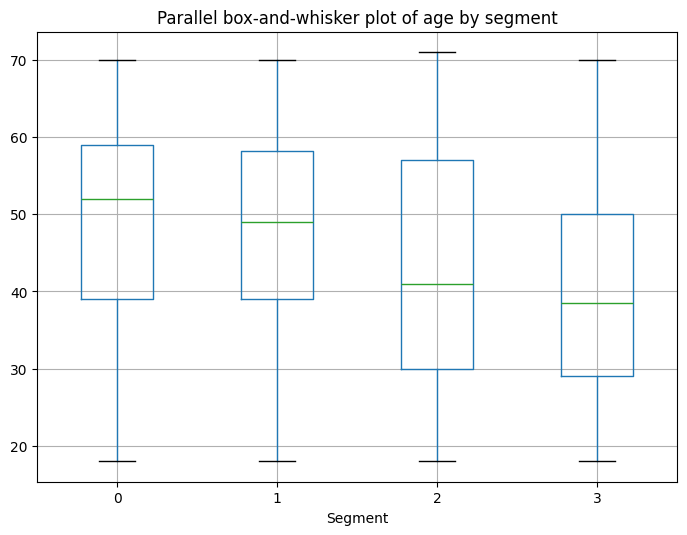

In [25]:
df = pd.DataFrame({'Segment': k4, 'Age': mcdonalds['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [26]:
mcdonalds2['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds2['VisitFrequency'])
visit = mcdonalds2.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [27]:
mcdonalds2['Like'] = LabelEncoder().fit_transform(mcdonalds2['Like'])
Like = mcdonalds2.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


In [28]:
mcdonalds2['Gender'] = LabelEncoder().fit_transform(mcdonalds2['Gender'])
Gender = mcdonalds2.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


In [29]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.432432,5.888514,2.787162
1,1,0.547569,4.957717,2.596195
2,2,0.427481,3.694656,2.618321
3,3,0.401447,3.915009,2.598553


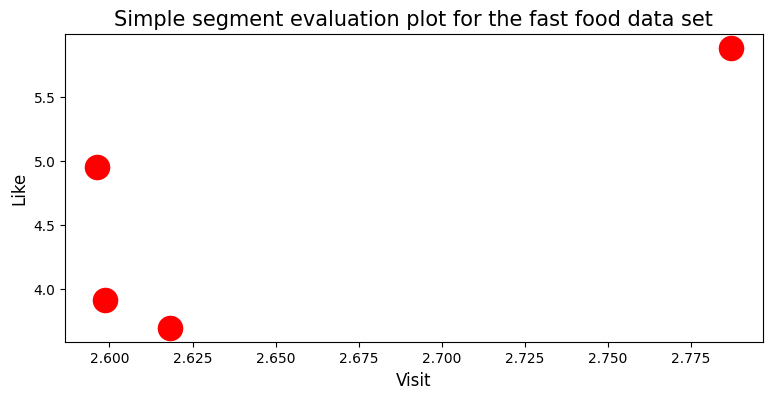

In [30]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()